In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
red = pd.read_csv('winequality-red.csv', delimiter=";")
white = pd.read_csv('winequality-white.csv', delimiter=";")
wine = pd.concat([red, white], ignore_index=True) 

In [3]:
#should i make a column with red or white indicators?

In [4]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
wine['quality'].info

<bound method Series.info of 0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64>

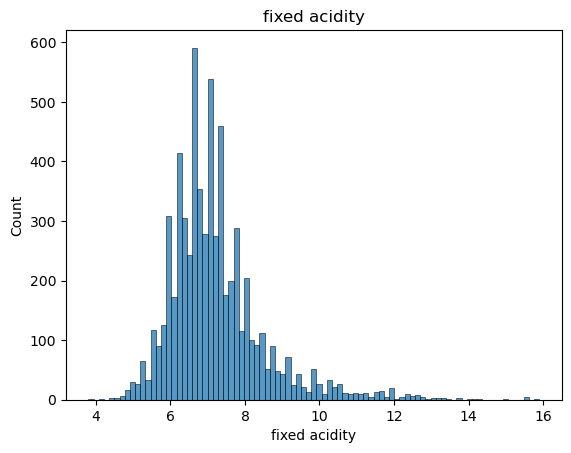

In [7]:
sns.histplot(wine["fixed acidity"], kde=False)
plt.title("fixed acidity")
plt.xlabel("fixed acidity")
plt.ylabel("Count")
plt.show()

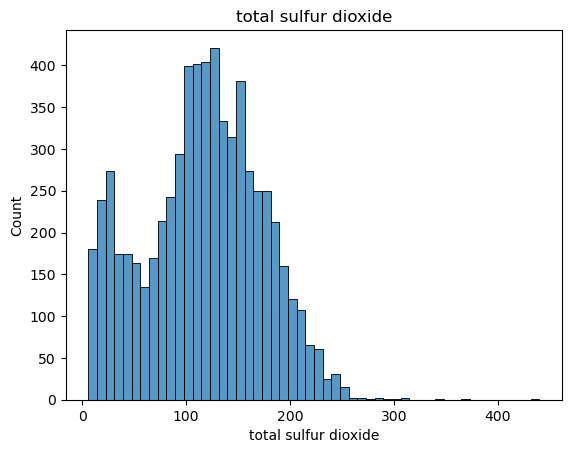

In [8]:
sns.histplot(wine["total sulfur dioxide"], kde=False)
plt.title("total sulfur dioxide")
plt.xlabel("total sulfur dioxide")
plt.ylabel("Count")
plt.show()

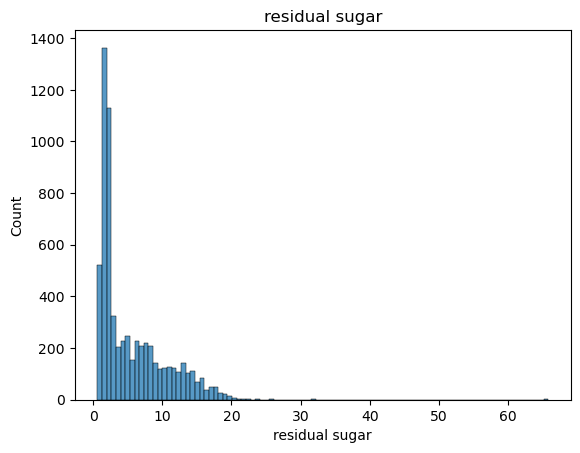

In [9]:
sns.histplot(wine["residual sugar"], kde=False)
plt.title("residual sugar")
plt.xlabel("residual sugar")
plt.ylabel("Count")
plt.show()


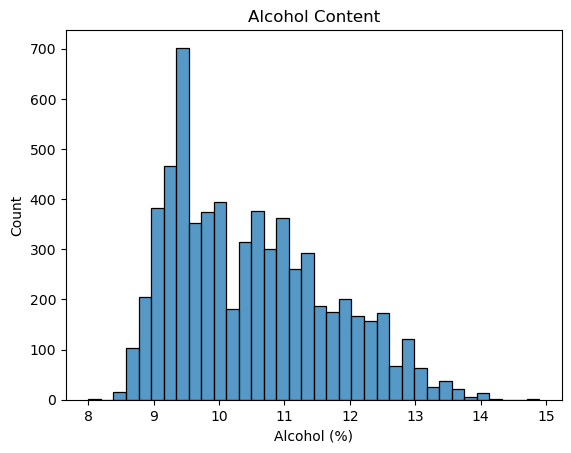

In [10]:
sns.histplot(wine["alcohol"], kde=False)
plt.title("Alcohol Content")
plt.xlabel("Alcohol (%)")
plt.ylabel("Count")
plt.show()

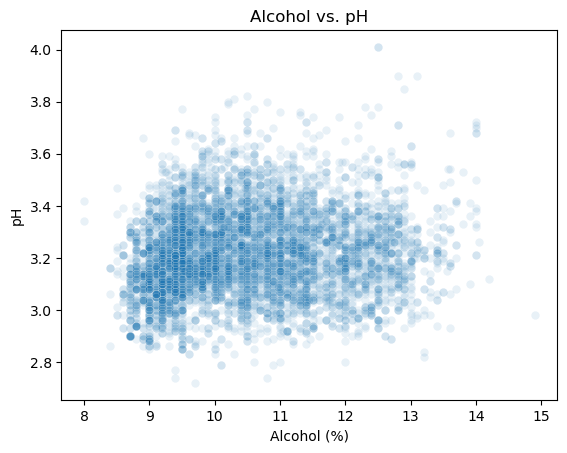

In [11]:
sns.scatterplot(data=wine, x="alcohol", y="pH", alpha=0.1)
plt.title("Alcohol vs. pH")
plt.xlabel("Alcohol (%)")
plt.ylabel("pH")
plt.show()

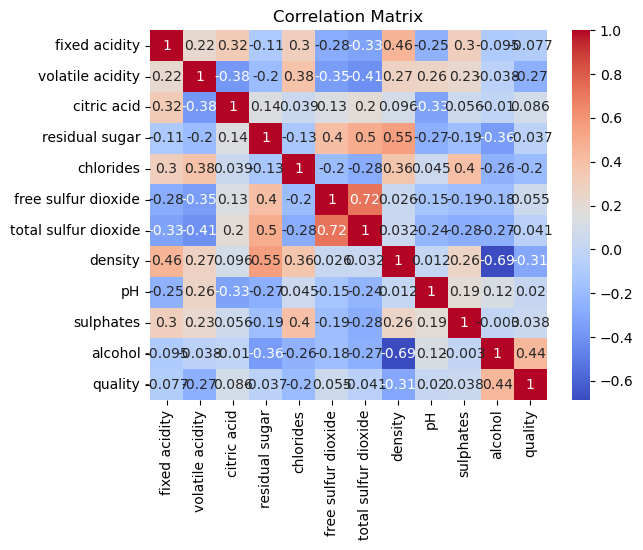

In [12]:
corr_matrix = wine.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

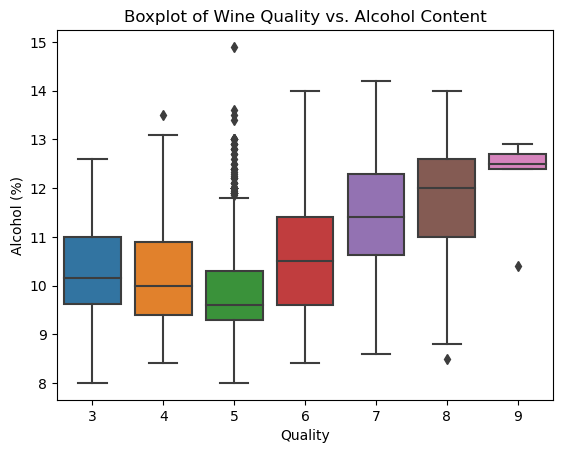

In [13]:
sns.boxplot(x="quality", y="alcohol", data=wine)
plt.title("Boxplot of Wine Quality vs. Alcohol Content")
plt.xlabel("Quality")
plt.ylabel("Alcohol (%)")
plt.show()

In [14]:
#add a data pipeline here to make it easier to edit desired features

In [15]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(wine.drop("quality", axis=1), wine["quality"], test_size = 0.25, random_state = 1)

# x_test1
# x_train1

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")

knn.fit(x_train1, y_train1)
y_pred1 = knn.predict(x_test1)

accuracy = accuracy_score(y_test1, y_pred1)
print(accuracy)

0.49230769230769234


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
#next, try different values of n and different features to find the most relevant hyperparameters

In [18]:
#also, talk to team about transformations on data, which ones should we do? which transformations to which columns?

In [19]:
#This section is the tuning of my model
# I start with making the type of wine into a column
# I then use GridSearchCV to find the best hyperparameters
# I then find the best features

In [20]:
red_wine = pd.read_csv("winequality-red.csv", delimiter=";")
red_wine["wine_type"] = 1

white_wine = pd.read_csv("winequality-white.csv", delimiter=";")
white_wine["wine_type"] = 0

wine_correct = pd.concat([red_wine, white_wine], ignore_index=True)

wine_correct

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [21]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(wine_correct.drop("quality", axis=1), wine_correct["quality"], test_size = 0.25, random_state = 1)

# x_test2
# x_train2

In [22]:
knn_2 = KNeighborsClassifier()

parameters_test = {"n_neighbors": [3, 5, 7, 9, 11, 13], "weights": ["uniform", "distance"]}

grid_search = GridSearchCV(knn_2, parameters_test, cv = 10) 
grid_search.fit(x_train2, y_train2)


print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best hyperparameters: {'n_neighbors': 11, 'weights': 'distance'}
Accuracy: 0.5679440030969133


In [23]:
select_param = SelectKBest(score_func=f_classif, k=5)
select_param.fit(x_train2, y_train2)
print("Selected features:", x_train2.columns[select_param.get_support()])

Selected features: Index(['volatile acidity', 'chlorides', 'density', 'alcohol', 'wine_type'], dtype='object')


In [24]:
# This section makes another test data and train data with the 5 best features
# I then use GridSearchCV to find the best hyperparameters
# I then make another KNN with the best hyperparameters and the best features to find the accuracy
# I then end with making a classification report

In [25]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(wine_correct[['volatile acidity', 'chlorides', 'density', 'alcohol', 'wine_type']], wine_correct["quality"], test_size = 0.25, random_state = 1)

x_test3
x_train3

,volatile acidity,chlorides,density,alcohol,wine_type
275,0.545,0.087,0.99650,10.7,1
3406,0.200,0.053,1.00080,8.8,0
3163,0.280,0.059,0.99580,10.1,0
4623,0.130,0.042,0.99581,10.7,0
2527,0.250,0.055,0.99800,10.0,0
...,...,...,...,...,...
905,0.580,0.081,0.99800,9.5,1
5192,0.280,0.044,0.99200,10.7,0
3980,0.230,0.042,0.99518,10.2,0
235,0.630,0.097,0.99675,9.0,1


In [26]:
# knn_3 = KNeighborsClassifier(n_neighbors=5, weights="uniform")

# knn_3.fit(x_train3, y_train3)
# y_pred1_2 = knn_3.predict(x_test3)

# accuracy_3 = accuracy_score(y_test3, y_pred1_2)
# print(accuracy_3)

In [27]:
knn_3 = KNeighborsClassifier()

parameters_test_2 = {"n_neighbors": [3, 5, 7, 9, 11, 13], "weights": ["uniform", "distance"]}

grid_search_2 = GridSearchCV(knn_3, parameters_test, cv = 10) 
grid_search_2.fit(x_train3, y_train3)


print("Best hyperparameters:", grid_search_2.best_params_)
print("Accuracy:", grid_search_2.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best hyperparameters: {'n_neighbors': 11, 'weights': 'distance'}
Accuracy: 0.6096067425185984


In [28]:
knn_3 = KNeighborsClassifier(n_neighbors=11, weights="distance")

knn_3.fit(x_train3, y_train3)
y_pred1_2 = knn_3.predict(x_test3)

accuracy_3 = accuracy_score(y_test3, y_pred1_2)
print("Accuracy:", accuracy_3)

Accuracy: 0.6178461538461538


In [29]:
print(classification_report(y_test3, y_pred1_2))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.38      0.13      0.20        61
           5       0.65      0.67      0.66       537
           6       0.63      0.66      0.64       715
           7       0.56      0.55      0.56       267
           8       0.56      0.38      0.45        39
           9       0.00      0.00      0.00         1

    accuracy                           0.62      1625
   macro avg       0.40      0.34      0.36      1625
weighted avg       0.61      0.62      0.61      1625



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
